## Topic modelling

В этой тетрадке показываются основные приёмы работы с LDA, варианты подбора параметров и способы визуализации. При необходимости можно будет сделать отдельную тетрадку с пояснением механизма работы алгоритма.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from termcolor import colored

from nltk.stem.wordnet import WordNetLemmatizer

import pyLDAvis.gensim
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

import tm_functions

%load_ext autoreload
%autoreload 2

d:\datascience\python_projects\current_projects\proj_news_viz\topic_model\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
# Фиксирование рандома и прочее
np.random.seed(42)
lemma = WordNetLemmatizer()
ru_stop = stopwords.words('russian')

### Обработка текста

Для этой тетрадки использую только 1 датасет. Но по факту работа с несколькими ничем не отличается, кроме объёма данных

In [3]:
data = pd.read_csv('data/novayagazeta.ru.txt.gz', sep='\t', encoding='utf-8', header=None)
data.columns = ['id', 'url', 'title', 'text']
# есть немного дубликатов
data = data.drop_duplicates('url')

Для начала токенизируем тексты.

In [6]:
%%time
data.loc[:, 'cleaned_text'] = data['text'].apply(lambda x: tm_functions.text_to_words(x, return_tokenized=False, lemmatizer=lemma, stop_words=ru_stop))

Wall time: 21.2 s


In [7]:
%%time
data.loc[:, 'tokenized_text'] = data['text'].apply(lambda x: tm_functions.text_to_words(x, lemmatizer=lemma, stop_words=ru_stop, return_tokenized=True))

Wall time: 21.1 s


### LDA

Для работы с LDA нам нужно подготовить 2 объекта:
* словарь, в котором каждому слову присваивается уникальный id;
* список преобразованных текстов;

Первое по факту - список уникальных слов и их id, второе - Bag of Words. Так что при желании можно сделать вручную.

In [8]:
%%time
dictionary = corpora.Dictionary(data['tokenized_text'].values)

Wall time: 5.15 s


In [9]:
%%time

doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['tokenized_text'].values]

Wall time: 3.67 s


Теперь создадим саму модель. В неё подаём созданные нами объекты, количество топиков и passes - сколько раз модель пройдётся по данным. Можно передавать и другие параметры, но это в следующий раз.

In [10]:
%%time
ldamodel = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary, passes=10)

Wall time: 1min 24s


Один из лучших инструментов для визуализации LDA - pyLDAvis.

In [11]:
%%time
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, mds='tsne')

Wall time: 12.2 s


Можно поиграться с визуализацией, советую подвигать слайдер в правом верхнем углу.

In [12]:
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.170424  0.072308       1        1  35.142170
2      0.000678 -0.143759       2        1  33.886250
1     -0.171102  0.071451       3        1  30.971586, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
238    Default  10481.000000         также  10481.000000  30.0000  30.0000
267    Default  28731.000000           это  28731.000000  29.0000  29.0000
2151   Default   4408.000000           суд   4408.000000  28.0000  28.0000
1584   Default  14413.000000        россии  14413.000000  27.0000  27.0000
4131   Default   5470.000000            рф   5470.000000  26.0000  26.0000
197    Default   4139.000000         ранее   4139.000000  25.0000  25.0000
4223   Default   3891.000000       украины   3891.000000  24.0000  24.0000
4071   Default   3386.000000      сообщает   3386.000000  23.0000  23.0000
7057   Default   4114.000000        словам   4114.000000  22.0000  22.0000
4171   Default   4204.000000        заявил   4204.000000  21.0000  21.0000
35185  Default   3634.000000       читайте   3634.000000  20.0000  20.0000
6031   Default   2440.000000         сирии   2440.000000  19.0000  19.0000
3387   Default   1881.000000          делу   1881.000000  18.0000  18.0000
8070   Default   1607.000000           фсб   1607.000000  17.0000  17.0000
805    Default   4984.000000         очень   4984.000000  16.0000  16.0000
4256   Default   2481.000000         пресс   2481.000000  15.0000  15.0000
1336   Default   2753.000000          дела   2753.000000  14.0000  14.0000
1228   Default   6254.000000       человек   6254.000000  13.0000  13.0000
1591   Default   1502.000000      самолета   1502.000000  12.0000  12.0000
6188   Default   1480.000000       адвокат   1480.000000  11.0000  11.0000
12268  Default   2019.000000      передает   2019.000000  10.0000  10.0000
852    Default   1493.000000       погибли   1493.000000   9.0000   9.0000
1120   Default   3463.000000           сша   3463.000000   8.0000   8.0000
4487   Default   1423.000000           мвд   1423.000000   7.0000   7.0000
2152   Default   1891.000000          суда   1891.000000   6.0000   6.0000
876    Default   1616.000000       полиции   1616.000000   5.0000   5.0000
4261   Default   1840.000000       сообщил   1840.000000   4.0000   4.0000
3024   Default   2261.000000     рассказал   2261.000000   3.0000   3.0000
2250   Default   2525.000000        данным   2525.000000   2.0000   2.0000
1274   Default   2309.000000  безопасности   2309.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
4071    Topic3   2876.520508      сообщает   3386.907471   1.0088  -6.0915
197     Topic3   3416.937988         ранее   4139.139160   0.9804  -5.9193
4261    Topic3   1649.121826       сообщил   1840.507446   1.0623  -6.6478
4223    Topic3   3147.865234       украины   3891.502441   0.9600  -6.0014
5014    Topic3   1381.389526       ссылкой   1518.085327   1.0777  -6.8250
238     Topic3   7339.632324         также  10481.100586   0.8158  -5.1548
1336    Topic3   2302.679932          дела   2753.851807   0.9932  -6.3140
12268   Topic3   1754.797241      передает   2019.493652   1.0316  -6.5857
4131    Topic3   4053.951660            рф   5470.283203   0.8725  -5.7484
7057    Topic3   3164.734375        словам   4114.320801   0.9097  -5.9960
3024    Topic3   1907.747192     рассказал   2261.367676   1.0021  -6.5022
4256    Topic3   2056.249512         пресс   2481.363770   0.9842  -6.4272
35185   Topic3   2756.002686       читайте   3634.454346   0.8954  -6.1343
4171    Topic3   2835.348145        заявил   4204.943359   0.7780  -6.1059
1447    Topic3   2681.116455       области   4004.748047   0.7709  -6.1619
1228    Topic3   3591.323242       человек   6254.674316   0.6173  -5.8696
1274    Topi

Нам бы как-то оценить качество модели. Попробуем 2 метрики.

In [13]:
%%time
perplexity = ldamodel.log_perplexity(doc_term_matrix)
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data['tokenized_text'].values, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

Wall time: 36.7 s


In [14]:
print(f'Perplexity: {perplexity}')
print(f'Coherence Score: {coherence_lda}')

Perplexity: -10.236437817054153
Coherence Score: 0.35981135455277763


In [36]:
%%time
model_list, coherence_values = tm_functions.compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix,
                                                                     texts=data['tokenized_text'].values,
                                                                     start=2, limit=10, step=1)

Wall time: 16min 3s


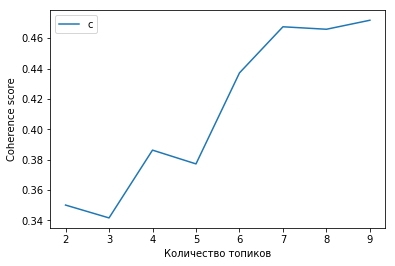

In [37]:
x = range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Количество топиков")
plt.ylabel("Coherence score")
plt.legend("coherence_values", loc='best')
plt.show()

В принципе можно попробовать и большее количество топиков, но и 9 хватит. Дальше буду использовать модель с 9 топиками.

In [40]:
best_model = model_list[-1]

In [42]:
%%time
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(best_model, doc_term_matrix, dictionary, mds='tsne')

Wall time: 19.3 s


In [43]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      -97.233101  127.816849       1        1  23.338352
8       57.629757   49.207756       2        1  15.839108
7       56.326645 -204.322372       3        1  14.706431
0      213.400024   87.203873       4        1  13.635532
4     -127.832855 -185.296066       5        1  11.044997
6     -189.309570  -10.521477       6        1   8.035498
5       58.175167  209.609024       7        1   7.035221
3      169.884018  -83.082077       8        1   4.166325
2      -29.348425  -60.310524       9        1   2.198536, topic_info=      Category          Freq            Term         Total  loglift  logprob
term                                                                        
4223   Default   3826.000000         украины   3826.000000  30.0000  30.0000
238    Default  10758.000000           также  10758.000000  29.0000  29.0000
267    Default  28841.000000             это  28841.000000  28.0000  28.0000
2151   Default   4822.000000             суд   4822.000000  27.0000  27.0000
207    Default   5745.000000          рублей   5745.000000  26.0000  26.0000
1584   Default  14509.000000          россии  14509.000000  25.0000  25.0000
6031   Default   1851.000000           сирии   1851.000000  24.0000  24.0000
1120   Default   3119.000000             сша   3119.000000  23.0000  23.0000
43     Default  13027.000000            года  13027.000000  22.0000  22.0000
3211   Default   2004.000000               г   2004.000000  21.0000  21.0000
4131   Default   5729.000000              рф   5729.000000  20.0000  20.0000
1228   Default   6169.000000         человек   6169.000000  19.0000  19.0000
7057   Default   4278.000000          словам   4278.000000  18.0000  18.0000
197    Default   4293.000000           ранее   4293.000000  17.0000  17.0000
948    Default   4206.000000          против   4206.000000  16.0000  16.0000
4171   Default   4229.000000          заявил   4229.000000  15.0000  15.0000
1337   Default   4928.000000            дело   4928.000000  14.0000  14.0000
1591   Default   1472.000000        самолета   1472.000000  13.0000  13.0000
3226   Default   2257.000000           новая   2257.000000  12.0000  12.0000
1336   Default   2976.000000            дела   2976.000000  11.0000  11.0000
876    Default   1710.000000         полиции   1710.000000  10.0000  10.0000
1324   Default   1713.000000     государство   1713.000000   9.0000   9.0000
2246   Default   2265.000000     государства   2265.000000   8.0000   8.0000
4071   Default   3490.000000        сообщает   3490.000000   7.0000   7.0000
2304   Default   2064.000000             млн   2064.000000   6.0000   6.0000
20851  Default   1331.000000        савченко   1331.000000   5.0000   5.0000
35185  Default   3746.000000         читайте   3746.000000   4.0000   4.0000
2447   Default   3626.000000          страны   3626.000000   3.0000   3.0000
3387   Default   2043.000000            делу   2043.000000   2.0000   2.0000
2305   Default   1514.000000            млрд   1514.000000   1.0000   1.0000
...        ...           ...             ...           ...      ...      ...
3218    Topic9    145.296234    коммуникаций    161.988419   3.7086  -6.4318
14237   Topic9    172.073914      библиотеки    202.192123   3.6561  -6.2627
3235    Topic9    455.646698          письма    672.662170   3.4279  -5.2889
3246    Topic9    215.844284           сайта    272.816895   3.5831  -6.0360
1580    Topic9    267.345428        редакцию    357.515900   3.5267  -5.8221
4169    Topic9    203.072891               з    291.162262   3.4571  -6.0970
32715   Topic9    163.729004    роскомнадзор    216.939621   3.5360  -6.3124
2343    Topic9    122.432091  опубликованные    139.135651   3.6895  -6.6030
4762    Topic9    237.833313          церкви    394.662415   3.3109  -5.9390
13447   Topic9    195.893677       памятника    294.554657   3.4095  -6.1330
3211    

Какие-то топики можно довольно легко понять!

А теперь достанем самые популярные топики из каждого текста.

In [92]:
df_topic_sents_keywords = tm_functions.format_topics_sentences(ldamodel=best_model, corpus=doc_term_matrix, texts=data['tokenized_text'].values)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6452,"это, которые, россия, например","[предсказывал, страницах, также, сайте, новой,..."
1,1,7.0,0.5932,"это, говорит, человек, лет, день, детей, очень...","[август, освобожденные, заключенные, площади, ..."
2,2,7.0,0.3731,"это, человек, лет, день, детей, люди, года","[август, россии, время, трагических, годовщин,..."
3,3,7.0,0.3425,"говорит, человек, лет, день, люди, года, нам","[м, избирательном, округе, районы, выхино, жул..."
4,4,1.0,0.6132,"это, россии, которые, очень, власти, просто, р...","[белоруссия, казахстан, которыми, россии, тамо..."
5,5,7.0,0.5723,"это, говорит, человек, лет, день, очень, люди,...","[самой, крупной, самой, тяжелой, самой, сложно..."
6,6,2.0,0.9897,"г, письма, письме, газета, новая, данных, сайте","[электронное, периодическое, издание, новая, г..."
7,7,1.0,0.4553,"это, россии, которые, очень, который, именно, ...","[руководитель, интернет, портала, усыновите, р..."
8,8,3.0,0.4930,,"[около, человек, погибли, результате, атаки, б..."
9,9,4.0,0.5473,"россии, также","[большинство, россиян, поддержали, запрет, имп..."


А теперь для каждого топика поищем тексты, где доля этого топика максимальна. Это может помочь упростить их интерпретацию

In [93]:
# Найдём индексы строк, в которых содержатся максимальные доли каждого из топиков
top_indices = df_topic_sents_keywords.groupby('Dominant_Topic')['Perc_Contribution'].nlargest(1).reset_index()['level_1']

In [94]:
df_topic_sents_keywords[df_topic_sents_keywords.index.isin(top_indices)]

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
6,2.0,0.9897,"г, письма, письме, газета, новая, данных, сайте","[электронное, периодическое, издание, новая, г..."
422,4.0,0.9931,"россии, рублей, года, году, тысяч","[россии, перезапустили, программу, утилизации,..."
2508,8.0,0.9579,"это, жизни, лет, который, мир, т","[эстет, денди, гмии, имени, пушкина, проходит,..."
3259,1.0,0.9715,"это, власти, россия","[ольга, мирясова, младший, научный, сотрудник,..."
3819,5.0,0.9923,"украины, россии, ранее","[гуманитарная, колонна, донбасса, пересекла, г..."
8570,0.0,0.9940,"года, суд, также, рф","[госдума, сегодня, досрочно, прекратила, депут..."
9392,6.0,0.9936,"также, дело, сообщает","[фигуранта, дела, убийстве, бориса, немцова, б..."
12332,3.0,0.9365,сирии,"[специальный, корреспондент, новой, газеты, по..."
14046,7.0,0.9592,"это, лет","[маленькая, юля, долгожданный, младший, ребено..."


Ещё для каждого топика можно посмотреть количество документов.

In [104]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
condition = df_topic_sents_keywords.index.isin(top_indices)
topic_num_keywords = df_topic_sents_keywords[condition][['Dominant_Topic', 'Topic_Keywords']].reset_index(drop=True)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,2.0,"г, письма, письме, газета, новая, данных, сайте",2642,0.1824
1,4.0,"россии, рублей, года, году, тысяч",1846,0.1274
2,8.0,"это, жизни, лет, который, мир, т",314,0.0217
3,1.0,"это, власти, россия",597,0.0412
4,5.0,"украины, россии, ранее",2725,0.1881
5,0.0,"года, суд, также, рф",1994,0.1377
6,6.0,"также, дело, сообщает",2157,0.1489
7,3.0,сирии,1010,0.0697
8,7.0,"это, лет",1200,0.0828


Ну и попробуем раскрасить слова в тексте в цвета по топикам. Возьмём случайный текст

In [140]:
ind = np.random.randint(0, data.shape[0])
document = best_model[doc_term_matrix][ind]

In [169]:
color_dict = {0: 'red', 1: 'green', 2: 'blue', 3: 'teal', 4: 'cyan', 5: 'yellow', 6: 'magenta', 7: 'gold', 8: 'white'}
# Каждому слову в тексте будет соответствовать цвет его топика
word_color = {dictionary.id2token[i[0]] : color_dict[max(i[1], key=lambda x: x[1])[0]] for i in document[2]}

In [171]:
tokens = data['tokenized_text'][ind]

In [173]:
ids = [dictionary.token2id[i] for i in tokens]
colored_text = ' '.join([colored(j, word_color[j]) for j in tokens])

In [174]:
print(colored_text)

фото евгений фельдман содержащаяся спецблоке матросской тишины надежда савченко держит голодовку двух месяцев несмотря стремительно ухудшающееся здоровье обследовавшие немецкие медики пришли заключению скоро постепенно начнут отказывать внутренние органы выходить собирается ультиматум савченко российским властям изменить меру пресечения любую другую связанную лишением свободы украинскую летчицу вступился совет президенте правам человека члены онк ск суд стоят своем савченко которая признает вины пособничестве убийстве двух журналистов вгтрк которой президент порошенко днях присвоил звание героя украины своем навестившие савченко понедельник глава спч михаил федотов врач елизавета глинка безуспешно пытались уговорить прекратить голодовку аналогичным призывом выступили депутаты верховной рады украины происходит надеждой савченко чувствует ожидает почему отказываются отпустить судебного решения хотя домашний арест новая поговорила адвокатом украинской летчицы ильей новиковым какие новости

Можно увидеть, что иногда похожие слова относятся к разным топикам, но в целом есть что-то адекватное.